In [9]:
%load_ext autoreload
%autoreload 2

import math
import sys
import matplotlib.pyplot as plt

import boto3
import numpy as np

sys.path.append('../')
sys.path.append('../../')
from run_utils import get_env_dataset, run_env_experiment, plot_ratings_mses
from run_utils import s3_experiment_dir_name, plot_ratings_mses_s3, s3_load_trial
from reclab.environments import Topics, LatentFactorBehavior
from env_defaults import *
from reclab.recommenders import Llorma, LibFM, TopPop, PerfectRec, KNNRecommender, EASE, Autorec, RandomRec


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


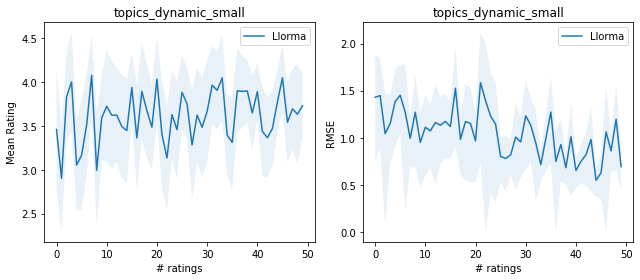

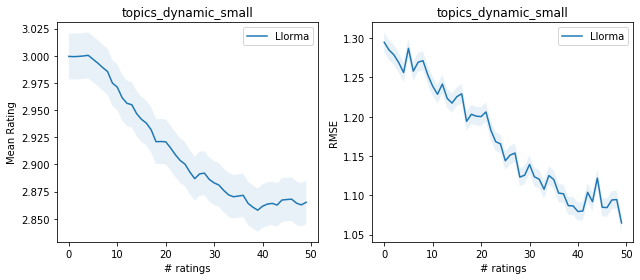

In [10]:
# S3 storage parameters
bucket_name = 'recsys-eval'
data_dir = 'master'

env_names = ['topics_dynamic_small']
recommender_names = ['Llorma']


for env_name in env_names:

    if env_name == 'topics_static':
        ENV_PARAMS = TOPICS_STATIC
    elif env_name == 'topics_dynamic':
        ENV_PARAMS = TOPICS_DYNAMIC
    elif env_name == 'latent_static':
        ENV_PARAMS = LATENT_STATIC
    elif env_name == 'latent_dynamic':
        ENV_PARAMS = LATENT_DYNAMIC
    elif env_name == 'topics_static_small':
        ENV_PARAMS = TOPICS_STATIC_SMALL
    elif env_name == 'topics_dynamic_small':
        ENV_PARAMS = TOPICS_DYNAMIC_SMALL
    elif env_name == 'latent_static_small':
        ENV_PARAMS = LATENT_STATIC_SMALL
    elif env_name == 'latent_dynamic_small':
        ENV_PARAMS = LATENT_DYNAMIC_SMALL
    else:
        assert False, "environment not implemented!"


    # Experiment setup.
    n_trials = 1
    trial_seeds = [i for i in range(n_trials)]
    num_init_ratings = ENV_PARAMS['optional_params']['num_init_ratings']
    len_trial = get_len_trial(ENV_PARAMS)
    num_users = ENV_PARAMS['params']['num_users']

    environment_name = ENV_PARAMS['name']
    env_name = ENV_PARAMS['name']
    
    plot_ratings_mses_s3(recommender_names,
                         len_trial,
                         bucket_name,
                         data_dir,
                         env_name,
                         trial_seeds,
                         plot_dense=False,
                         num_users=num_users,
                         num_init_ratings=num_init_ratings,
                         threshold=10,
                         title=[env_name, env_name])
    

    plot_ratings_mses_s3(recommender_names,
                         len_trial,
                         bucket_name,
                         data_dir,
                         env_name,
                         trial_seeds,
                         plot_dense=True,
                         num_users=num_users,
                         num_init_ratings=num_init_ratings,
                         threshold=10,
                         title=[env_name, env_name])
    

In [6]:
bucket_name = 'recsys-eval'
data_dir = 'Mihaela'

recommender_names = ['Llorma']
n_trials = 10
trial_seeds = [i for i in range(n_trials)]

llorma_params = {
                "max_item": 170,
                "max_user": 100,
                'batch_size': 128,
                'lambda_val': 0.01,
                'learning_rate': 0.03,
                'n_anchor': 10,
                'pre_lambda_val': 0.1,
                'pre_learning_rate': 0.002,
                'pre_rank': 5,
                'pre_train_steps': 50,
                'rank': 10,
                'result_path': 'results_static_small',
                'train_steps': 50,
                'use_cache': False}

recommenders = [
    Llorma(**llorma_params)
]

In [7]:
ENV_PARAMS = LATENT_STATIC_SMALL
env = LatentFactorBehavior(**ENV_PARAMS['params'], **ENV_PARAMS['optional_params'])
environment_names = [ENV_PARAMS['name']]
len_trial = get_len_trial(ENV_PARAMS)
ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=[env],
                                recommenders=recommenders,
                                trial_seeds=trial_seeds,
                                len_trial=len_trial,
                                environment_names=environment_names,
                                recommender_names=recommender_names,
                                bucket_name=bucket_name,
                                data_dir=data_dir,
                                overwrite=False)

Started experiments on environment: latent_static_small
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 16.52941176470588%
Running trials for recommender: Llorma
Running trial with seed: 0
Loading past results from S3 at directory: Mihaela/latent_static_small/Llorma/trials/seed_0/
Running trial with seed: 1






Pre-train step: 10, train_error:0.7433795670697341
Pre-train step: 20, train_error:0.6270652355605963
Pre-train step: 30, train_error:0.49505881046549727
Pre-train step: 40, train_error:0.3682223600708545
Pre-train step: 50, train_error:0.2904250351646348
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train step:10, train error: 0.6756535605761247, test error: 0.6756535605761247
Train step:20, train error: 0.6181765381895072, test error: 0.6181765381895072
Train step:30, train error: 0.5797817713883879, test error: 0.5797817713883879
Train step:40, train error: 0.5426173387260935, test e

Low: 2.361, Mean: 2.887, High: 3.444
Pre-train step: 10, train_error:0.7546169785095581
Pre-train step: 20, train_error:0.6250943894065839
Pre-train step: 30, train_error:0.500299786677721
Pre-train step: 40, train_error:0.38677853340920143
Pre-train step: 50, train_error:0.30988250619942187
Train step:10, train error: 0.6793575446768405, test error: 0.6793575446768405
Train step:20, train error: 0.6204758601164073, test error: 0.6204758601164073
Train step:30, train error: 0.5808188190130708, test error: 0.5808188190130708
Train step:40, train error: 0.5434620417966484, test error: 0.5434620417966484
Train step:50, train error: 0.5065161436301181, test error: 0.5065161436301181
Low: 2.354, Mean: 2.890, High: 3.450
Pre-train step: 10, train_error:0.7605112645561035
Pre-train step: 20, train_error:0.6244988725683674
Pre-train step: 30, train_error:0.49018428240406214
Pre-train step: 40, train_error:0.37873778774740025
Pre-train step: 50, train_error:0.29464354565774586
Train step:10, tr

KeyboardInterrupt: 

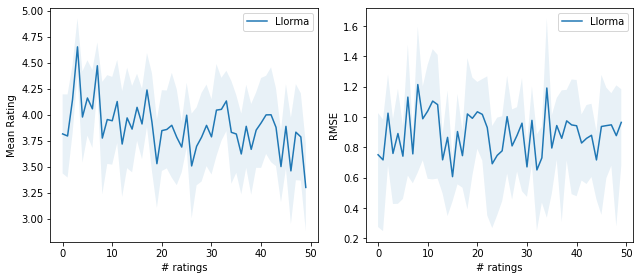

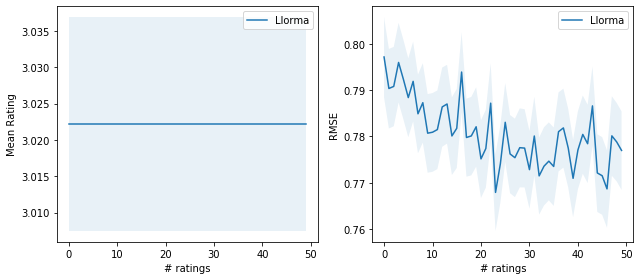

In [30]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)
plot_ratings_mses(dense_ratings[0], dense_preds[0], recommender_names)
# 50 steps of re-pre-train

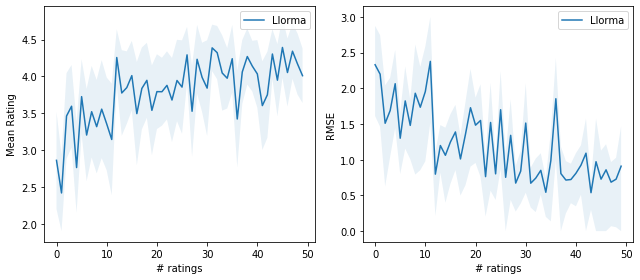

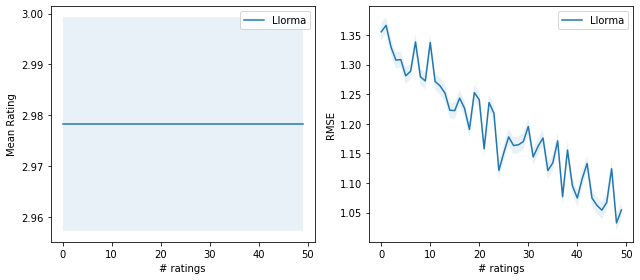

In [18]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)
plot_ratings_mses(dense_ratings[0], dense_preds[0], recommender_names)
# 100 steps + re-pre-train

In [72]:
get_len_trial(TOPICS_STATIC)

500